# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [13]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

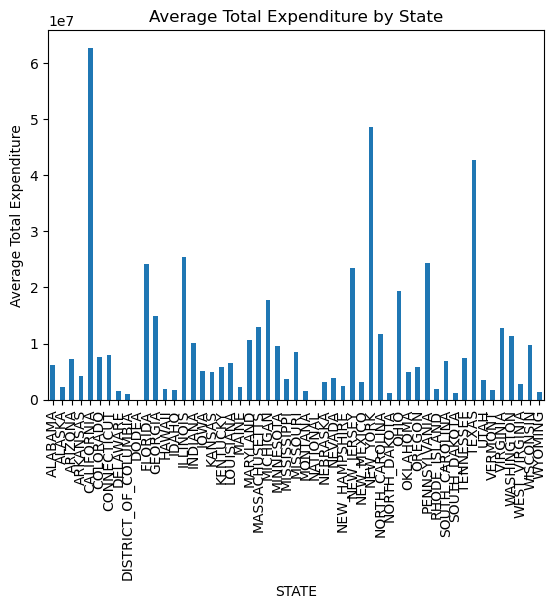

In [34]:
# Renaming columns
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

# Filling missing total enrollment estimates as done in the tutorial
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

# Dropping rows with missing grade 4 math scores as done in the tutorial
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

# Plotting total expenditure by state
df.groupby('STATE').TOTAL_EXPENDITURE.mean().plot(kind = 'bar', title = 'Average Total Expenditure by State')
plt.ylabel('Average Total Expenditure')

# Since average total expenditure varies widely by state, let's fill in missing total expenditures by using each state's average total expenditure
df['TOTAL_EXPENDITURE'] = df['TOTAL_EXPENDITURE'].fillna(df.groupby('STATE').TOTAL_EXPENDITURE.transform('mean'))





<Axes: >

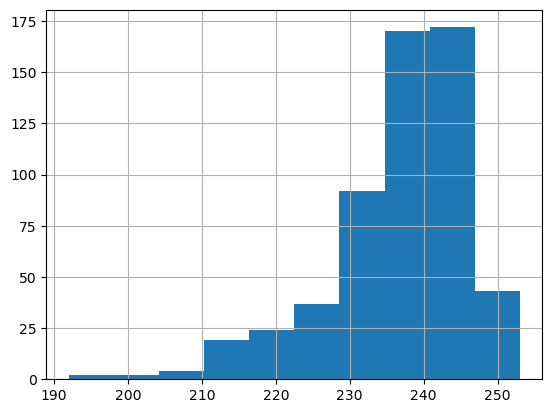

In [35]:
# Plotting the distribution of grade 4 math scores
df.AVG_MATH_4_SCORE.hist()
# The distribution is clearly skewed to the left, so we can fill in missing values with the median later on

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *GRADE 4 MATH*

How many years of data are logged in our dataset? 

In [27]:
# @@@ 1
print(df["YEAR"].nunique())

13


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [64]:
# @@@ 2

# Creating a subset of the data with only Michigan data
Michigan = df[df["STATE"] == "MICHIGAN"]
MichAvg = Michigan["AVG_MATH_4_SCORE"].mean()
# Creating a subset of the data with only Ohio data
Ohio = df[df["STATE"] == "OHIO"]
OhioAvg = Ohio["AVG_MATH_4_SCORE"].mean()
if MichAvg > OhioAvg:
    print("Michigan", MichAvg)
else:  
    print("Ohio", OhioAvg)




Ohio 239.45454545454547


Find the average for your chosen test across all states in 2019

In [133]:
# @@@ 3
df["AVG_MATH_4_SCORE"].mean()

236.32743362831857

For each state, find a maximum value for your chosen test score

In [142]:
# @@@ 4
states = df["STATE"].unique()
for state in states:
    state_df = df[df["STATE"] == state]
    state_max_score = state_df["AVG_MATH_4_SCORE"].max()
    print(state, state_max_score)
        

ALABAMA 233.0
ARIZONA 240.0
ARKANSAS 240.0
CALIFORNIA 235.0
COLORADO 247.0
CONNECTICUT 245.0
DELAWARE 243.0
DISTRICT_OF_COLUMBIA 235.0
FLORIDA 246.0
GEORGIA 240.0
HAWAII 243.0
IDAHO 242.0
INDIANA 249.0
IOWA 246.0
KENTUCKY 242.0
LOUISIANA 234.0
MAINE 246.0
MARYLAND 247.0
MASSACHUSETTS 253.0
MICHIGAN 238.0
MINNESOTA 253.0
MISSISSIPPI 241.0
MISSOURI 241.0
NEBRASKA 246.0
NEW_HAMPSHIRE 253.0
NEW_JERSEY 249.0
NEW_MEXICO 233.0
NEW_YORK 243.0
NORTH_CAROLINA 245.0
NORTH_DAKOTA 246.0
OHIO 246.0
OKLAHOMA 240.0
PENNSYLVANIA 246.0
RHODE_ISLAND 242.0
SOUTH_CAROLINA 238.0
TENNESSEE 241.0
TEXAS 244.0
UTAH 244.0
VIRGINIA 248.0
WEST_VIRGINIA 237.0
WISCONSIN 245.0
WYOMING 248.0
ILLINOIS 239.0
KANSAS 248.0
MONTANA 244.0
NEVADA 237.0
OREGON 240.0
VERMONT 248.0
ALASKA 237.0
SOUTH_DAKOTA 242.0
WASHINGTON 246.0
NATIONAL 242.0
DODEA 250.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [65]:
# @@@ 5
expenditure_per_student = df["TOTAL_EXPENDITURE"] / df["ENROLL_ALL_EST"]
df["expenditure_per_student"] = expenditure_per_student
df


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,expenditure_per_student
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2.653798e+06,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3.401580e+06,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1.743022e+06,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,2.713883e+07,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3.264826e+06,1642466.0,...,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,5.329154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,1.274068e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,1.125444e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,2.865072e+06,NaN,...,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,9.806508e+06,NaN,...,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN


Feature engineering justification: **<I agreed with the idea above that creating a feature representing how much each state spent per student that year could be related to the math scores of grade 4 students.\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

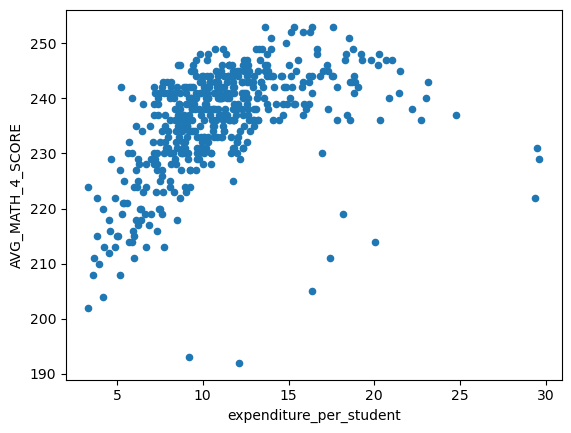

In [30]:
# @@@ 6
plot = df.plot.scatter(x='expenditure_per_student', y='AVG_MATH_4_SCORE')

**<There seems to be a somewhat strong relationship between expenditure per student and the average math scores of 4th graders; this makes logical sense, since theoretically, spending more money per student on education could provide them with better resources to support their academics. However, we do see that the upper end of expenditure_per_student does not seem to necessarily yield higher 4th grade math scores than states who spend a more typical amount per student.>**

**Visualization 2**

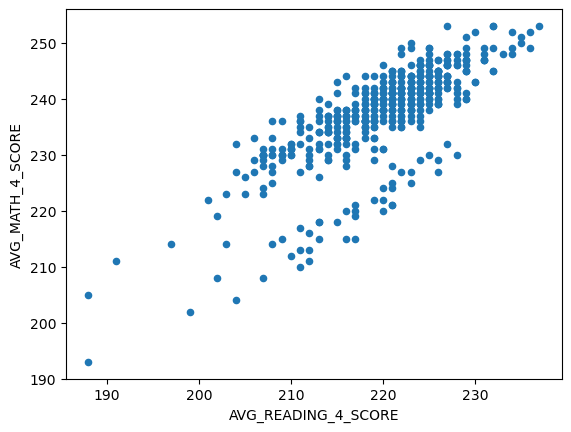

In [31]:
# @@@ 7
plot = df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE')

**<From the scatterplot, there seems to be a relatively strong positive linear relationship between the reading scores and math scores of 4th graders. This is likely because at this grade level, high-achieving students typically perform well at both reading and math, while average or low-performing students struggle at both.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [46]:
from sklearn.model_selection import train_test_split

In [50]:
# @@@ 8

X = df[["expenditure_per_student", "AVG_READING_4_SCORE"]].dropna()
y = df.loc[X.index]["AVG_MATH_4_SCORE"]

# Filling in missing y-values using the median
y.fillna(y.median(), inplace = True)


In [52]:
# @@@ 9 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [53]:
# @@@ 10
from sklearn.linear_model import LinearRegression


In [54]:
# @@@ 11
# create your model here
model = LinearRegression()

In [55]:
model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [60]:
# @@@ 12
# R^2 score
R2 = model.score(X_test, y_test)
# Root mean squared error
RMS = np.mean((model.predict(X_test)-y_test)**2)**0.5

print("R-squared:", R2, "Root mean squared error:", RMS)




R-squared: 0.651170102717583 Root mean squared error: 6.109388410269963


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

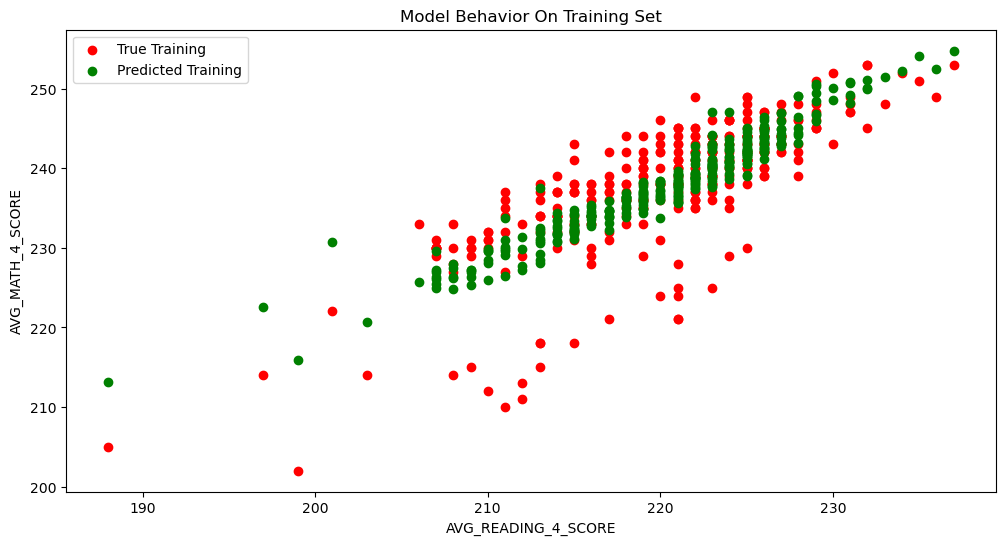

In [61]:
# @@@ 13

col_name = 'AVG_READING_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

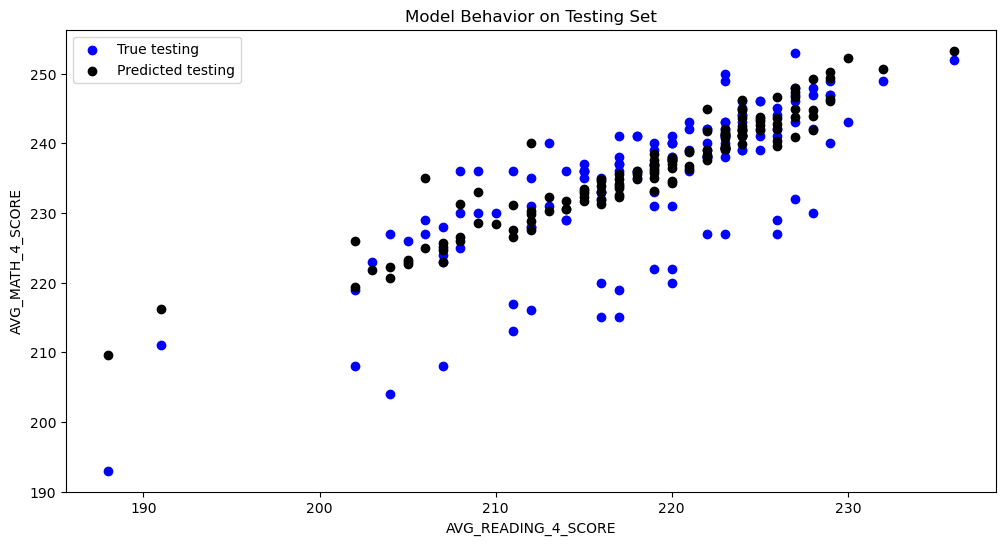

In [62]:
# @@@ 14


col_name = 'AVG_READING_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")